# Módulos `Pandas` - DataFrame

**Dataframe.** Es una estructura bidimensional mutable de datos con los ejes etiquetados donde

- cada fila representa una observación diferente
- cada columna representa una variable diferente

En `Python`, para definir un dataframe, en primer lugar necesitamos importar el módulo `pandas`.

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.4.4'

## Crear dataframe

### Crear dataframe a partir diccionario
Para ello, primero creamos un diccionario donde las claves serán los nombres de las columnas y los valores serán listas, con tantos elementos como número de filas queramos.

Finalmente, convertimos ese diccionario a dataframe con la función `DataFrame()` de `pandas`:

In [3]:
dic = {"x": [1, 2, 3, 4, 5], "y": [2, 4, 6, 8, 10]}

df1 = pd.DataFrame(data = dic)
print(df1)
print("Tipo de clase: ", type(df1))

   x   y
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10
Tipo de clase:  <class 'pandas.core.frame.DataFrame'>


In [4]:
df1.head(2)

,x,y
0,1,2
1,2,4


Como habíamos dicho, hemos creado un dataframe de 5 filas y dos columnas, llamadas `x` e `y` respectivamente.

**¡Cuidado!.** Al construir un dataframe a partir de un diccionario (o cualquier objeto de `Python` que contenga algún diccionario), los nombres de las columnas son las claves del diccionario. Si quisiésemos cambiarlos con el parámetro `columns` directamente, nos pasaría lo siguiente:

In [5]:
d = {"a": [1, 2, 3],
     "b": [4, 5, 6],
     "b1": [7, 8, 9]}

df = pd.DataFrame(d, columns = ["b1", "b"]) 
print(df)

   b1  b
0   7  4
1   8  5
2   9  6



### Crear dataframe a partir lista

Vamos a crear el mismo dataframe de 5 filas y 2 columnas, pero esta vez a partir de una lista de listas.

En este caso, podemos hacerlo directamente con la función `DataFrame()` de `pandas`, usando los parámetros `data` y `columns`

In [6]:
lista = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]

df2 = pd.DataFrame(data = lista,
                   columns = ["x", "y"])
print(df2)
print("Tipo de clase: ", type(lista))

   x   y
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10
Tipo de clase:  <class 'list'>


Al parámetro `data` le hemos proporcionado una lista de 5 listas, donde cada una de las sublistas tiene 2 elementos: el perteneciente a la primera columna en la posición 0, y el perteneciente a la segunda columna en la posición 1.

Al parámetro `columns` le hemos proporcionado el nombre de las 2 columnas.

### Crear dataframe segun formato CSV

Vamos a cargar el archivo llamado `Datos_CSV.csv` que tenemos guardado en la carpeta Directorio local.

Para ello, lo primero que tenemos que hacer es import os para agregar el directorio disco local y 

A continuación, navegamos por nuestro Google Drive hasta encontrar el archivo csv en cuestión. De sus opciones, seleccionamos copiar ruta. Esa ruta será la que pasemos por parámetro a la función `read_csv()`


In [7]:
import os

In [8]:
os.getcwd()

'D:\\PYTHON\\sig_python\\Script'

In [103]:
os.chdir(r"D:\PYTHON\sig_python\Script\DATOS")
os.getcwd()

'D:\\PYTHON\\sig_python\\Script\\DATOS'

In [104]:
Datos_CSV = pd.read_csv("Datos_CSV.csv", delimiter=";")

In [105]:
# Emprime los 3 valores primero
Datos_CSV.head(3)

,Temperatura,Pais,Precipitacion,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500


In [106]:
# Emprime los e valores ultimos
Datos_CSV.tail(5)

,Temperatura,Pais,Precipitacion,Altitud
3,25,Colombia,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
7,25,Peru,385,2600


In [107]:
type(Datos_CSV)

pandas.core.frame.DataFrame

### Crear dataframe segun formato XLS o XLSX

In [108]:
# Instalar dependencia para Excel
#!pip install xlrd
#!pip install openpyxl

In [109]:
Datos_XLS = pd.read_excel("Datos_EXCEL.xlsx")
Datos_XLS.head()

,Temperatura,Pais,Precipitacion,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,Colombia,450,3000
4,30,Chile,320,2600


## Dimensiones del dataframe

Con el método `.shape` podemos calcular las dimensiones (número de filas y columnas) del dataframe.

In [110]:
Datos_XLS.shape

(8, 4)

Como resultado obtenemos una tupla donde el primer elemento es el número de filas, que en nuestro caso es 8, mientras que el segundo elemento es el número de columnas, que en nuestro ejemplo era 4.

In [111]:
nrows = Datos_XLS.shape[0]
ncols = Datos_XLS.shape[1]
print("El número de filas de Datos_XLS es", nrows)
print("El número de columnas de Datos_XLS es", ncols)

El número de filas de Datos_XLS es 8
El número de columnas de Datos_XLS es 4


Con el método `.size` calculamos el número total de valores que tienes el dataframe (número de filas por número de columnas)

In [112]:
Datos_XLS.size

32

In [113]:
nrows * ncols

32

In [114]:
# Comparando
nrows * ncols == Datos_XLS.size

True

Finalmente, con el método `.ndim` calculamos el número de dimensiones que tiene el dataframe. Éste siempre valdrá 2, pues consta de filas y columnas.

In [115]:
Datos_XLS.ndim

2

## Subdataframes

**Subdataframe.** Dado un dataframe, un subdataframe no es más que la selección de unas filas y columnas en particular.

### Columnas

Dado un dataframe, podemos seleccionar una columna en particular de diversas formas:

- Indicando el nombre de la columna entre claudators, `[]`
- Con el método `.columns[]`
- Con el método `.loc[]` (por nombre o etiqueta)
- Con el método `.iloc[]` (por posición)

In [116]:
Datos_XLS.head(8)

,Temperatura,Pais,Precipitacion,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,Colombia,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
7,25,Peru,385,2600


In [117]:
# Seleccionamos la columna Pais
Pais = list(Datos_XLS["Pais"])
Pais

['Bolivia',
 'Brasil',
 'Ecuador',
 'Colombia',
 'Chile',
 'Peru',
 'Ecuador',
 'Peru']

In [118]:
# Seleccionamos la columna Pais con el método .columns[]
print(Datos_XLS[Datos_XLS.columns[0]])

0    25
1    20
2    30
3    25
4    30
5    15
6    24
7    25
Name: Temperatura, dtype: int64


In [119]:
# Seleccionamos la columna Pais con el método .loc[]
print(Datos_XLS.loc[0:5, "Pais"])

0     Bolivia
1      Brasil
2     Ecuador
3    Colombia
4       Chile
5        Peru
Name: Pais, dtype: object


**Observación.** Al método `.loc[]` le hemos indicado que tome todas las filas con `:` en la primera posición y la columna `"Pais"` indicando el índice que ocupa como columna.

Si quisiésemos seleccionar más de una columna, podríamos hacerlo con todas las opciones enumeradas anteriormente, con ligeras modificaciones en algunos casos:

In [120]:
# Seleccionamos las columnas Pais y Altitud por nombre
print(Datos_XLS[["Altitud","Temperatura","Pais"]])

   Altitud  Temperatura      Pais
0     1500           25   Bolivia
1     1800           20    Brasil
2     2500           30   Ecuador
3     3000           25  Colombia
4     2600           30     Chile
5     3600           15      Peru
6     3500           24   Ecuador
7     2600           25      Peru


In [121]:
# Seleccionamos las columnas Pais y Altitud con el método .columns[]
print(Datos_XLS[Datos_XLS.columns[[1,2,3]]])

       Pais  Precipitacion  Altitud
0   Bolivia            300     1500
1    Brasil            325     1800
2   Ecuador            400     2500
3  Colombia            450     3000
4     Chile            320     2600
5      Peru            352     3600
6   Ecuador            360     3500
7      Peru            385     2600


In [122]:
# Seleccionamos las columnas Pais y Altitud con el método .loc[]
print(Datos_XLS.loc[2:5, ["Pais", "Altitud"]])

       Pais  Altitud
2   Ecuador     2500
3  Colombia     3000
4     Chile     2600
5      Peru     3600


In [123]:
# Seleccionamos las columnas Pais y Altitud  con el método .iloc[]
print(Datos_XLS.iloc[:, [1, 3,0]])

       Pais  Altitud  Temperatura
0   Bolivia     1500           25
1    Brasil     1800           20
2   Ecuador     2500           30
3  Colombia     3000           25
4     Chile     2600           30
5      Peru     3600           15
6   Ecuador     3500           24
7      Peru     2600           25


In [124]:
# Filtro por la temperatura >= 25
Temp = Datos_XLS[Datos_XLS['Temperatura'] >= 25]
print(Temp.head(10))

   Temperatura      Pais  Precipitacion  Altitud
0           25   Bolivia            300     1500
2           30   Ecuador            400     2500
3           25  Colombia            450     3000
4           30     Chile            320     2600
7           25      Peru            385     2600


### Filas

Dado un dataframe, podemos seleccionar una fila en particular de diversas formas:

- Con el método `.loc[]` (por nombre o etiqueta)
- Con el método `.iloc[]` (por posición)

In [125]:
# Seleccionamos la primera observación (0) con el método .iloc[]
print(Datos_XLS.iloc[2])

Temperatura           30
Pais             Ecuador
Precipitacion        400
Altitud             2500
Name: 2, dtype: object


In [126]:
# Seleccionamos la última observación con el método .iloc[]
print(Datos_XLS.iloc[-1])

Temperatura        25
Pais             Peru
Precipitacion     385
Altitud          2600
Name: 7, dtype: object


In [127]:
# Seleccionamos la segunda y cuarta observación con el método .loc[]
print(Datos_XLS.loc[[1,3]]) # Tambien se puede buscar string "Datos"

   Temperatura      Pais  Precipitacion  Altitud
1           20    Brasil            325     1800
3           25  Colombia            450     3000


### Filas y columnas

Para seleccionar un elemento en concreto, hay que indicar la fila y la columna y lo podemos hacer de dos formas:

- Con el método `.loc[]` (por nombre o etiqueta)
- Con el método `.iloc[]` (por índice)

In [128]:
# Seleccionamos la segunda observación con el método .loc[]
print(Datos_XLS.loc[2, "Pais"])

Ecuador


In [129]:
# Seleccionamos la segunda observación con el método .iloc[]
print(Datos_XLS.iloc[2, 1])

Ecuador


Si queremos seleccionar un subconjunto de filas y columnas, podemos utilizar los dos métodos anteriores

In [130]:
# Seleccionamos la segunda y quinta fila y las columnas Pais y Altitud
# Con el método .loc[]
print(Datos_XLS.loc[2:5, ["Pais", "Altitud"]])

       Pais  Altitud
2   Ecuador     2500
3  Colombia     3000
4     Chile     2600
5      Peru     3600


In [131]:
# Con el método .iloc[]
print(Datos_XLS.iloc[2:6, [1, 3]])

       Pais  Altitud
2   Ecuador     2500
3  Colombia     3000
4     Chile     2600
5      Peru     3600


## Métodos de dataframes

El método `.head()` sirve para visualizar las primeras filas del dataframe. Por defecto, se nos mostrarán las 5 primeras

In [132]:
Datos_XLS.head()

,Temperatura,Pais,Precipitacion,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,Colombia,450,3000
4,30,Chile,320,2600


Si queremos que se nos muestre un número determinado de filas, tenemos que indicarlo por parámetro:

In [133]:
Datos_XLS.head(4)

,Temperatura,Pais,Precipitacion,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,Colombia,450,3000


El método `.tail()` sirve para visualizar las últimas filas del dataframe. Por defecto, se nos mostrarán las 5 últimas

In [134]:
Datos_XLS.tail()

,Temperatura,Pais,Precipitacion,Altitud
3,25,Colombia,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
7,25,Peru,385,2600


Si queremos que se nos muestre un número determinado de filas, tenemos que indicarlo por parámetro:

In [135]:
Datos_XLS.tail(3)

,Temperatura,Pais,Precipitacion,Altitud
5,15,Peru,352,3600
6,24,Ecuador,360,3500
7,25,Peru,385,2600


El método `.copy()` nos sirve para realizar una copia de un dataframe.

Si simplemente realizamos

In [136]:
Datos = Datos_XLS
Datos

,Temperatura,Pais,Precipitacion,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,Colombia,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
7,25,Peru,385,2600


El dataframe llamado `Datos` es solo una referencia del dataframe original `Datos_XLS` pues si realizamos algún cambio en `Datos`, se realiza también en `Datos_XLS`

In [137]:
Datos.iloc[3, 1] = "EEUU"
Datos_XLS

,Temperatura,Pais,Precipitacion,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,EEUU,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
7,25,Peru,385,2600


En cambio, si `Datos` es definido como

In [138]:
Datos = Datos_XLS.copy()

entonces ahora sí es una copia independiente del dataframe original y por muchos cambios que hagamos sobre dicha copia, el original se mantiene intacto

In [139]:
Datos.iloc[3, 1] = "RUSIA"
Datos_XLS

,Temperatura,Pais,Precipitacion,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,EEUU,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
7,25,Peru,385,2600


El método `.rename()` se puede utilizar tanto para cambiar las etiquetas de las filas como los nombres de las columnas. 

**¡Cuidado!** Para que los cambios se guarden en el dataframe original, necesitamos indicar `inplace = True`, de lo contrario, lo único que estamos haciendo es duplicar el dataframe, cambiando el nombre de las filas o columnas

In [140]:
Datos_XLS.rename(columns = {"Temperatura": "Temp",
                            "Precipitacion": "Prep"},
                 inplace = True)
Datos_XLS

,Temp,Pais,Prep,Altitud
0,25,Bolivia,300,1500
1,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,EEUU,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
7,25,Peru,385,2600


In [141]:
# Cambiamos el nombre de las filas al dataframe original
Datos_XLS.rename(index = {0: "Data1",
                          1: "Data2",
                          7: "Data8"},
                 inplace = True)
Datos_XLS

,Temp,Pais,Prep,Altitud
Data1,25,Bolivia,300,1500
Data2,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,EEUU,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
Data8,25,Peru,385,2600


Con el método `.columns` también podemos cambiar el nombre de las columnas:

In [143]:
list(Datos_XLS.columns)

['Temp', 'Pais', 'Prep', 'Altitud']

In [144]:
Datos_XLS.columns = ["TEMP", "PAIS","PREP","ALT"]
Datos_XLS

,TEMP,PAIS,PREP,ALT
Data1,25,Bolivia,300,1500
Data2,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,EEUU,450,3000
4,30,Chile,320,2600
5,15,Peru,352,3600
6,24,Ecuador,360,3500
Data8,25,Peru,385,2600


El método `.insert()` inserta una nueva columna a un dataframe existente

In [145]:
Datos_XLS.insert(loc = 2, column = "PRECIO", value = [2.50, 2.00, 0.35, 0.10, 0.35, 0.20, 0.15, 0.05])
Datos_XLS

,TEMP,PAIS,PRECIO,PREP,ALT
Data1,25,Bolivia,2.50,300,1500
Data2,20,Brasil,2.00,325,1800
2,30,Ecuador,0.35,400,2500
3,25,EEUU,0.10,450,3000
4,30,Chile,0.35,320,2600
5,15,Peru,0.20,352,3600
6,24,Ecuador,0.15,360,3500
Data8,25,Peru,0.05,385,2600


In [146]:
Datos_XLS.insert(1, "COLOR", "rojo")
Datos_XLS

,TEMP,COLOR,PAIS,PRECIO,PREP,ALT
Data1,25,rojo,Bolivia,2.50,300,1500
Data2,20,rojo,Brasil,2.00,325,1800
2,30,rojo,Ecuador,0.35,400,2500
3,25,rojo,EEUU,0.10,450,3000
4,30,rojo,Chile,0.35,320,2600
5,15,rojo,Peru,0.20,352,3600
6,24,rojo,Ecuador,0.15,360,3500
Data8,25,rojo,Peru,0.05,385,2600


El método `.drop()` nos permite borrar las filas o columnas que indiquemos

**¡Cuidado!** De nuevo, si queremos aplicar directamente los cambios al dataframe original, necesitamos indicar `inplace = True`

In [147]:
# Eliminamos filas (por indice), (axis = 0) por fila
df_dropped = Datos_XLS.drop(labels = ["Data1", 4], axis = 0)
df_dropped

,TEMP,COLOR,PAIS,PRECIO,PREP,ALT
Data2,20,rojo,Brasil,2.00,325,1800
2,30,rojo,Ecuador,0.35,400,2500
3,25,rojo,EEUU,0.10,450,3000
5,15,rojo,Peru,0.20,352,3600
6,24,rojo,Ecuador,0.15,360,3500
Data8,25,rojo,Peru,0.05,385,2600


In [148]:
# Eliminamos columnas (axis = 1) por etiqueta
df_dropped = df_dropped.drop(labels = ["COLOR", "PRECIO"], axis = 1)
df_dropped

,TEMP,PAIS,PREP,ALT
Data2,20,Brasil,325,1800
2,30,Ecuador,400,2500
3,25,EEUU,450,3000
5,15,Peru,352,3600
6,24,Ecuador,360,3500
Data8,25,Peru,385,2600


El método `.pop()` elimina la columna que indiquemos por parámetro

In [149]:
column_popped = df_dropped.pop("PREP")
column_popped

Data2    325
2        400
3        450
5        352
6        360
Data8    385
Name: PREP, dtype: int64

In [150]:
df_dropped

,TEMP,PAIS,ALT
Data2,20,Brasil,1800
2,30,Ecuador,2500
3,25,EEUU,3000
5,15,Peru,3600
6,24,Ecuador,3500
Data8,25,Peru,2600


In [151]:
# Volvemos a añadir la columna recientemente eliminada al final del dataframe con una sintaxis que no habíamos visto todavía
df_dropped["PREP"] = column_popped
df_dropped

,TEMP,PAIS,ALT,PREP
Data2,20,Brasil,1800,325
2,30,Ecuador,2500,400
3,25,EEUU,3000,450
5,15,Peru,3600,352
6,24,Ecuador,3500,360
Data8,25,Peru,2600,385


Dada una columna de un dataframe, el método `.unique()` devuelve un array con los valores únicos de dicha columna

In [152]:
print(Datos_XLS["PAIS"].unique())

['Bolivia' 'Brasil' 'Ecuador' 'EEUU' 'Chile' 'Peru']


El método `.nunique()` devuelve el conteo de cuántos valores únicos hay en cada columna

In [153]:
Datos_XLS.nunique()

TEMP      5
COLOR     1
PAIS      6
PRECIO    7
PREP      8
ALT       7
dtype: int64

## Estadísticas descriptivas

pandas DataFrames y Series contienen métodos útiles para obtener estadísticas de resumen. Los métodos disponibles incluyen `mean()`, `median()`, `min()`, `max()` y `std()` (la desviación estándar).

Podríamos, por ejemplo, comprobar la temperatura media en nuestros datos de entrada. Verificamos la media para una sola columna (*Series*):

In [154]:
# Check mean value of a column
Datos_XLS["TEMP"].mean()

24.25

In [155]:
Datos_XLS.describe()

,TEMP,PRECIO,PREP,ALT
count,8.000000,8.000000,8.000000,8.000000
mean,24.250000,0.712500,361.500000,2637.500000
std,4.949747,0.964272,48.983962,738.603895
min,15.000000,0.050000,300.000000,1500.000000
25%,23.000000,0.137500,323.750000,2325.000000
50%,25.000000,0.275000,356.000000,2600.000000
75%,26.250000,0.762500,388.750000,3125.000000
max,30.000000,2.500000,450.000000,3600.000000


In [156]:
# Seleccion de datos describe
Datos_XLS[["TEMP", "PRECIO", "ALT"]].describe()

,TEMP,PRECIO,ALT
count,8.000000,8.000000,8.000000
mean,24.250000,0.712500,2637.500000
std,4.949747,0.964272,738.603895
min,15.000000,0.050000,1500.000000
25%,23.000000,0.137500,2325.000000
50%,25.000000,0.275000,2600.000000
75%,26.250000,0.762500,3125.000000
max,30.000000,2.500000,3600.000000


<AxesSubplot:>

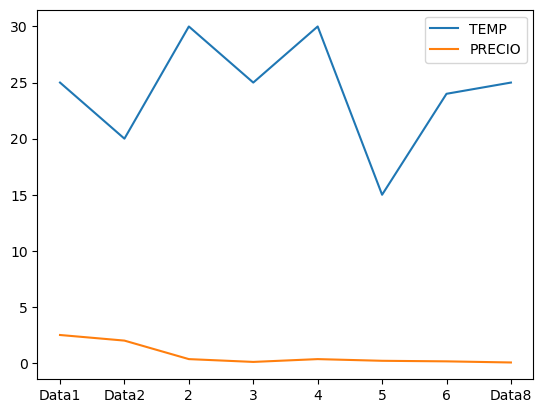

In [158]:
Datos_XLS[["TEMP", "PRECIO"]].plot()

In [159]:
Datos_XLS.columns

Index(['TEMP', 'COLOR', 'PAIS', 'PRECIO', 'PREP', 'ALT'], dtype='object')

In [160]:
# Calculate direncia entre campos
Datos_XLS["DIFEFENCIA"] = Datos_XLS["ALT"] - Datos_XLS["TEMP"]

# verificar resultados
Datos_XLS.head()

,TEMP,COLOR,PAIS,PRECIO,PREP,ALT,DIFEFENCIA
Data1,25,rojo,Bolivia,2.50,300,1500,1475
Data2,20,rojo,Brasil,2.00,325,1800,1780
2,30,rojo,Ecuador,0.35,400,2500,2470
3,25,rojo,EEUU,0.10,450,3000,2975
4,30,rojo,Chile,0.35,320,2600,2570


In [161]:
# Numero de unicos valores
Datos_XLS["TEMP"].nunique()

5

In [162]:
# Valores de los unicos valores Array
Datos_XLS["TEMP"].unique()

array([25, 20, 30, 15, 24], dtype=int64)

In [163]:
# Unicos valores en una lista
list(Datos_XLS["TEMP"].unique())

[25, 20, 30, 15, 24]